In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
df = pd.read_csv('../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.00,2013.09,4.22,1992.00,2011.00,2014.00,2016.00,2020.00
selling_price,4340.00,504127.31,578548.74,20000.00,208749.75,350000.00,600000.00,8900000.00
km_driven,4340.00,66215.78,46644.10,1.00,35000.00,60000.00,90000.00,806599.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [9]:
df = df.drop_duplicates()

## Car Fuel & Transmission Types with Double Pie Chart

In [10]:
df0 = df.groupby(['fuel','transmission']).size().reset_index()
df0 = df0.pivot_table(0, ['fuel','transmission'])


In [11]:
vals = df0[0]
group_sum = df0.groupby('fuel')[0].sum()

In [12]:
facecolor  = '#eaeaf2'
hfont      = {'fontname':'Cambri'}
labels     = ['CNG(%1)','Diesel (%50,3)','','LPG (%0,6)' ,'Petrol (%48)']
size       = 0.3

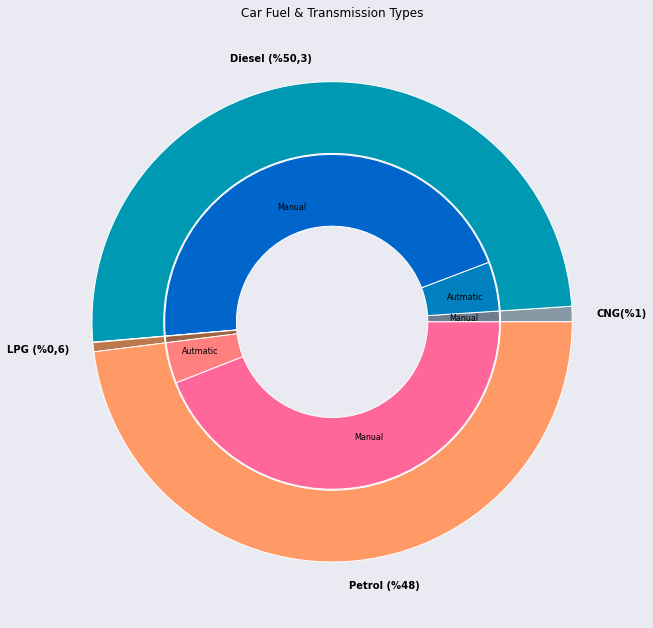

In [13]:
fig,ax        = plt.subplots(figsize=(11,11), facecolor=facecolor)
a,b,c,d,e,f,g = [plt.cm.bone, plt.cm.winter,  plt.cm.cool, plt.cm.copper, plt.cm.spring, plt.cm.gist_heat, plt.cm.pink]

outer_colors  = [a(.6), b(.6), c(.6), d(.6), e(.6)]
inner_colors  = [a(.5), 
                b(.5), b(.4),
                c(.5), 
                d(.5),
                e(.5),e(.4),]

ax.pie(group_sum, radius=1.004, colors=outer_colors, 
       labels=labels,pctdistance=1, 
       textprops={'weight':'bold', 'fontsize':10},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, radius=1-size, colors=inner_colors,
       labels=['Manual','Autmatic','Manual','','','Autmatic','Manual'],
       labeldistance = 0.70,
       textprops={'fontsize':8},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Car Fuel & Transmission Types')
plt.show()

## Car Marka Median Selling Price Vis.

In [14]:
# created new columns with name column
df['marka'] = df['name'].str.split(' ').str[0]

In [15]:
df1 = df.groupby(["transmission","fuel","marka"],as_index=False)[['selling_price']].median().rename(columns={'selling_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","marka"], 
                 values   ='price', color='marka',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

## Avarege Selling Price Car Marka

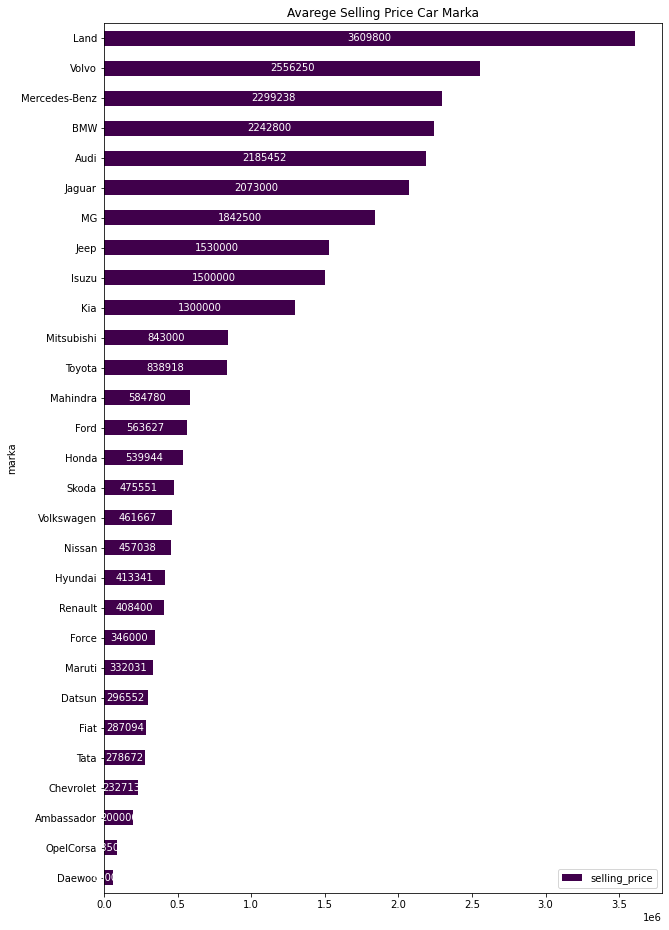

In [16]:
df_marka_price = df.groupby(['marka'])[['selling_price']].mean()
df_marka_price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = df_marka_price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Avarege Selling Price Car Marka')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)



## Top 10 Auto Model

In [17]:
df['model'] = df['name'].str.split(' ').str[1]

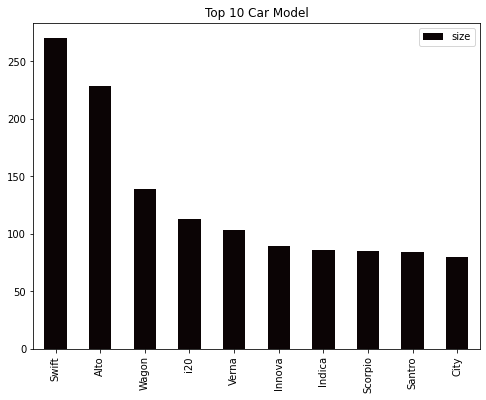

In [18]:
df_model = df.groupby(['marka','model'],as_index=False).size()
df_model.sort_values(by='size', ascending=False ,inplace=True)
df_model = df_model.iloc[:10]
ax   = df_model.plot(kind='bar', cmap='mako' , figsize=(8,6) ,title= 'Top 10 Car Model')
ax.set_xticklabels(list(df_model['model']), minor=False)
None

## Car Price Year Scatter Plot 

In [19]:
# Filter 4 columns
gen_df = df[["name", "year", 'selling_price','km_driven']]
gen_df = gen_df.dropna(how="any", axis=0)

In [20]:
def scatter_plot (dy,hue, palette):
    
    plt.figure(figsize=(14,9))
    sns.scatterplot(data=gen_df, x ="selling_price", 
                                 y =dy, hue=hue, palette=palette, size=hue, sizes=(10, 250))
    plt.xlabel("Price", size=18)
    plt.ylabel(dy, size=18)
    None

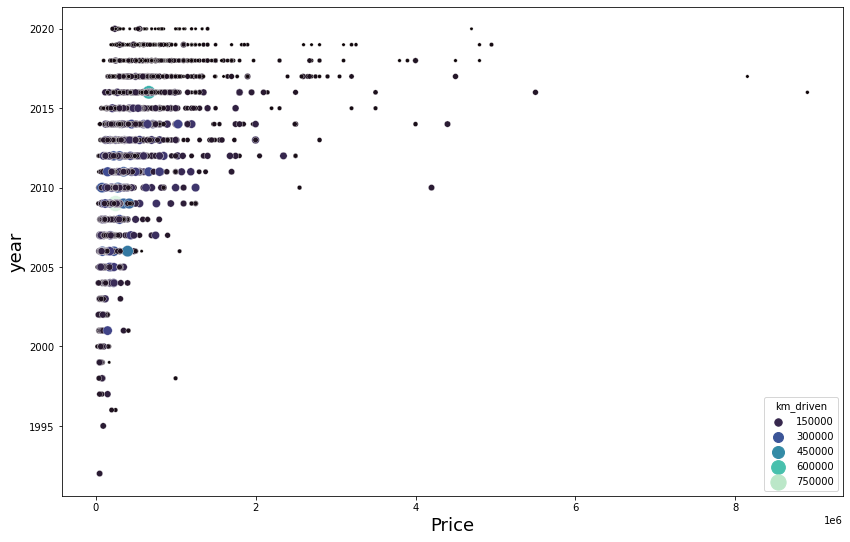

In [21]:
scatter_plot('year','km_driven', 'mako')

## Car Price Km Scatter Plot 

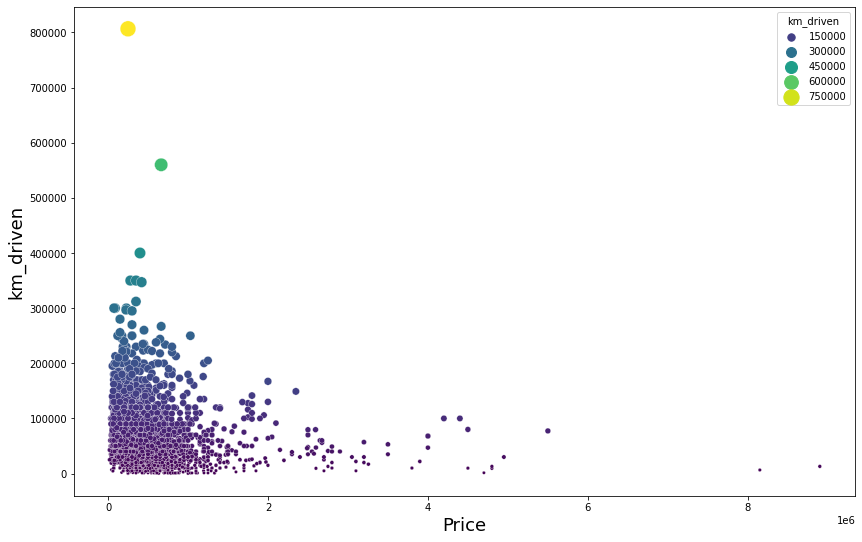

In [22]:
scatter_plot('km_driven','km_driven', 'viridis')

## Car Marka Year & Km with Altair Library

In [23]:
import altair as alt

brush  = alt.selection_interval()
points = alt.Chart(df).mark_point().encode(
    x  = alt.X('year:Q', scale=alt.Scale(domain=[1990, 2022])),
    y  ='km_driven:Q',
    color=alt.condition(brush, 'marka:N', alt.value('lightgray'))).add_selection(brush)

bars = alt.Chart(df).mark_bar().encode(
    y='marka:N',
    x='count(marka):Q',
    color='marka:N',).transform_filter(brush)

points.properties(width=600, height=400) & bars.properties(width=600, height=400)



alt.VConcatChart(...)

## Yearly Selling Price Change

In [24]:
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data , palette="rocket_r", linewidth=4.0)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, size=16)
    plt.xlabel(xlabel, size=18)

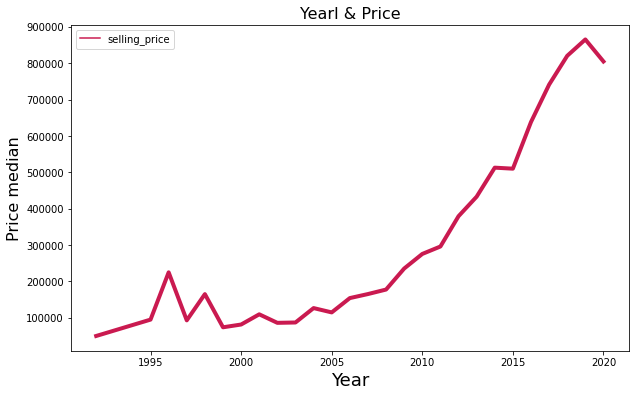

In [25]:
df_year_price = df.groupby(['year'])[['selling_price']].mean()
line_plot(df_year_price,'Yearl & Price', 'Year', "Price median")

In [26]:
#columns get dummies
get_list =['fuel', 'seller_type','transmission', 'owner']
for i in get_list:
    gd_df_x = df[i].str.get_dummies()
    df      = pd.concat([gd_df_x, df], axis=1, join='inner')

## Correleation HeatMap

<AxesSubplot:>

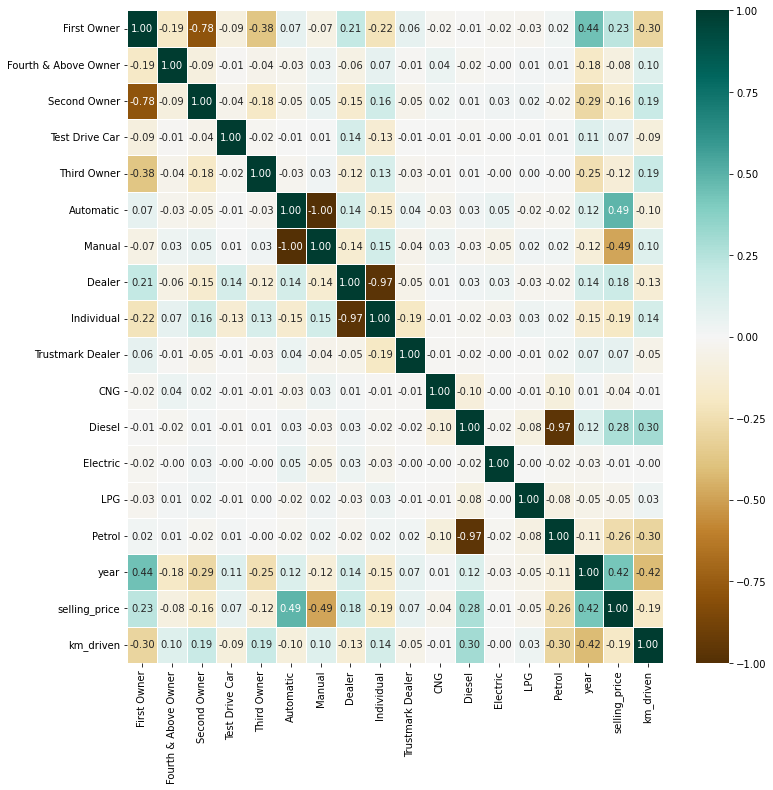

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

## Outlier Detection

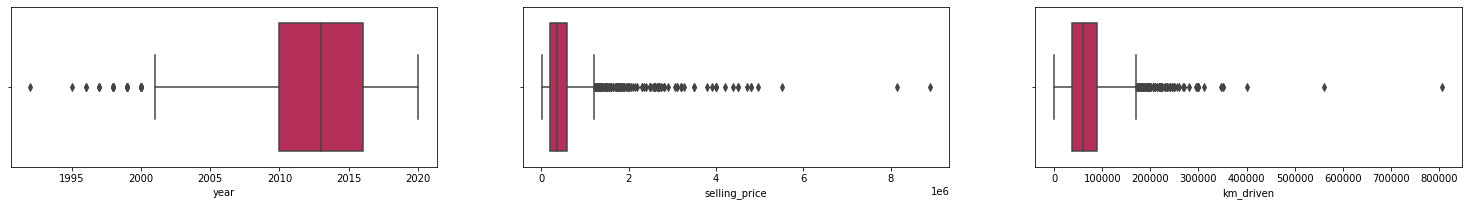

In [28]:
df_box_plot=df[['year', 'selling_price', 'km_driven']]
# elimizde numeric olarak gözüken tüm datanin Outlier box grafigi
i = 1
plt.figure(figsize=(26, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1

